In [32]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import *

In [16]:
littlegraph = pd.read_csv('littlegraph.csv')
nodes = np.unique(np.concatenate((littlegraph['First'].unique(), littlegraph['Second'].unique())))
littlematrix = np.zeros((len(nodes), len(nodes)))
nodesdict = dict(zip(nodes, range(len(nodes))))
for index, row in littlegraph.iterrows():
    first = row['First']
    second = row['Second']
    value = row['Direction']
    i = nodesdict[first]
    j = nodesdict[second]
    littlematrix[i, j] = value
graph = nx.DiGraph()
graph.add_nodes_from(nodes)
graph.add_edges_from([(row['First'], row['Second']) for index, row in littlegraph.iterrows()])

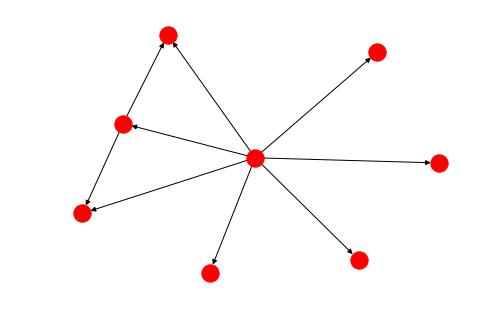

In [18]:
nx.draw(graph)
plt.show()

In [ ]:
#clearly the bottleneck here is cellular senescence
#not shown is epigenetic alteration, which is disconnected
#Cellular Senescence, Mitochondrial Mutations, Genomic Instability, and Stem Cell Exhaustion 
#form a more tightly connected subgraph

In [37]:
list(graph.edges)

[('Cellular Senescence', 'Altered Intercellular Communication'),
 ('Cellular Senescence', 'Mitochondrial Mutations'),
 ('Cellular Senescence', 'Genomic Instability'),
 ('Cellular Senescence', 'Loss of Proteostasis'),
 ('Cellular Senescence', 'Dysregulated Nutrient Sensing'),
 ('Cellular Senescence', 'Stem Cell Exhaustion'),
 ('Cellular Senescence', 'Telomere Attrition'),
 ('Genomic Instability', 'Mitochondrial Mutations'),
 ('Genomic Instability', 'Stem Cell Exhaustion')]

In [19]:
2**9

512

In [29]:
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [34]:
newnodes = list(powerset(nodes))

In [49]:
binarygraph = nx.DiGraph()

In [50]:
binarygraph.add_nodes_from(newnodes)

In [51]:
for node1 in newnodes:
    for node2 in newnodes:
        if len(set(itertools.product(node1, node2)).intersection(set(graph.edges))) > 0:
            binarygraph.add_edge(node1, node2)

In [59]:
def descendantcount(n, visited=[]):
    count =0
    visited.append(n)
    successors = list(binarygraph.successors(n))
    
    for i in successors:
        if i not in visited:
            visited.append(i)
            count += 1 + descendantcount(i, visited)
            
    return count

In [61]:
[node for node in newnodes if descendantcount(node) == 0]

[(),
 ('Altered Intercellular Communication',),
 ('Dysregulated Nutrient Sensing',),
 ('Genomic Instability',),
 ('Loss of Proteostasis',),
 ('Mitochondrial Mutations',),
 ('Stem Cell Exhaustion',),
 ('Telomere Attrition',),
 ('Altered Intercellular Communication', 'Cellular Senescence'),
 ('Altered Intercellular Communication', 'Dysregulated Nutrient Sensing'),
 ('Altered Intercellular Communication', 'Genomic Instability'),
 ('Altered Intercellular Communication', 'Loss of Proteostasis'),
 ('Altered Intercellular Communication', 'Mitochondrial Mutations'),
 ('Altered Intercellular Communication', 'Stem Cell Exhaustion'),
 ('Altered Intercellular Communication', 'Telomere Attrition'),
 ('Cellular Senescence', 'Dysregulated Nutrient Sensing'),
 ('Cellular Senescence', 'Genomic Instability'),
 ('Cellular Senescence', 'Loss of Proteostasis'),
 ('Cellular Senescence', 'Mitochondrial Mutations'),
 ('Cellular Senescence', 'Stem Cell Exhaustion'),
 ('Cellular Senescence', 'Telomere Attrition